In [1]:
import matplotlib.pyplot as plt
import numpy as np

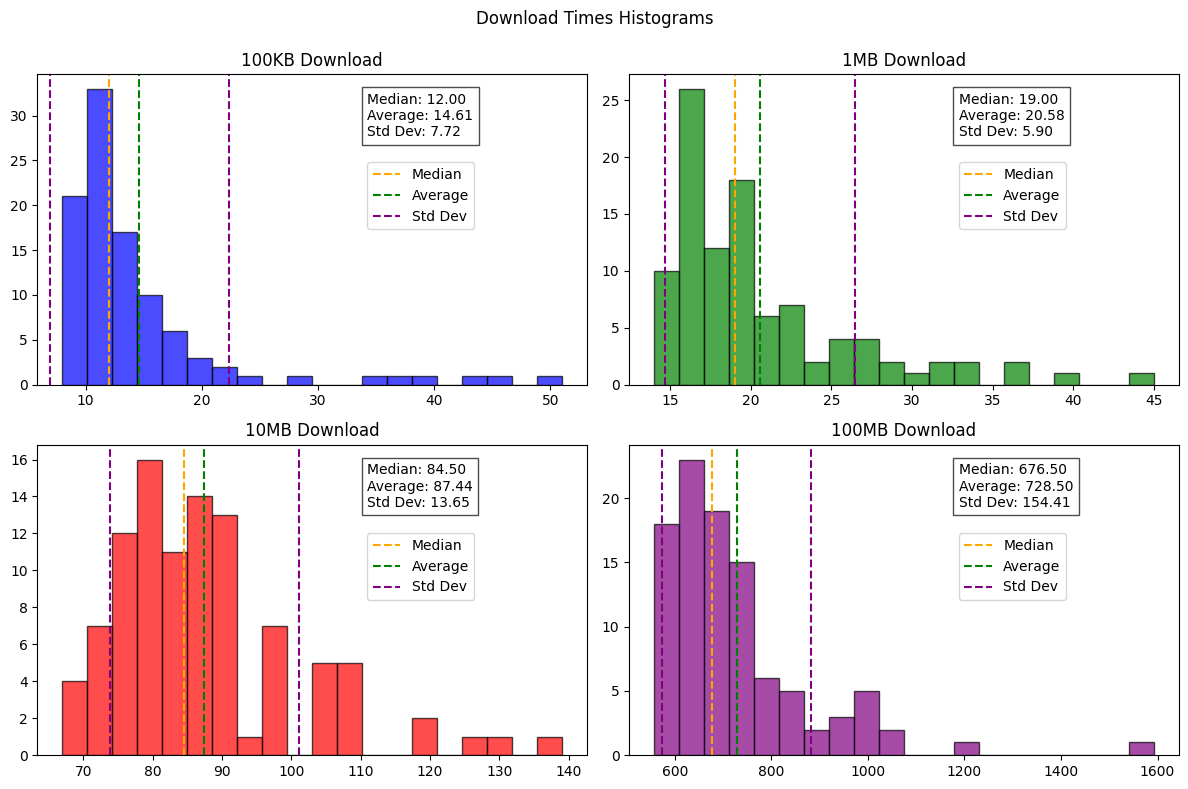

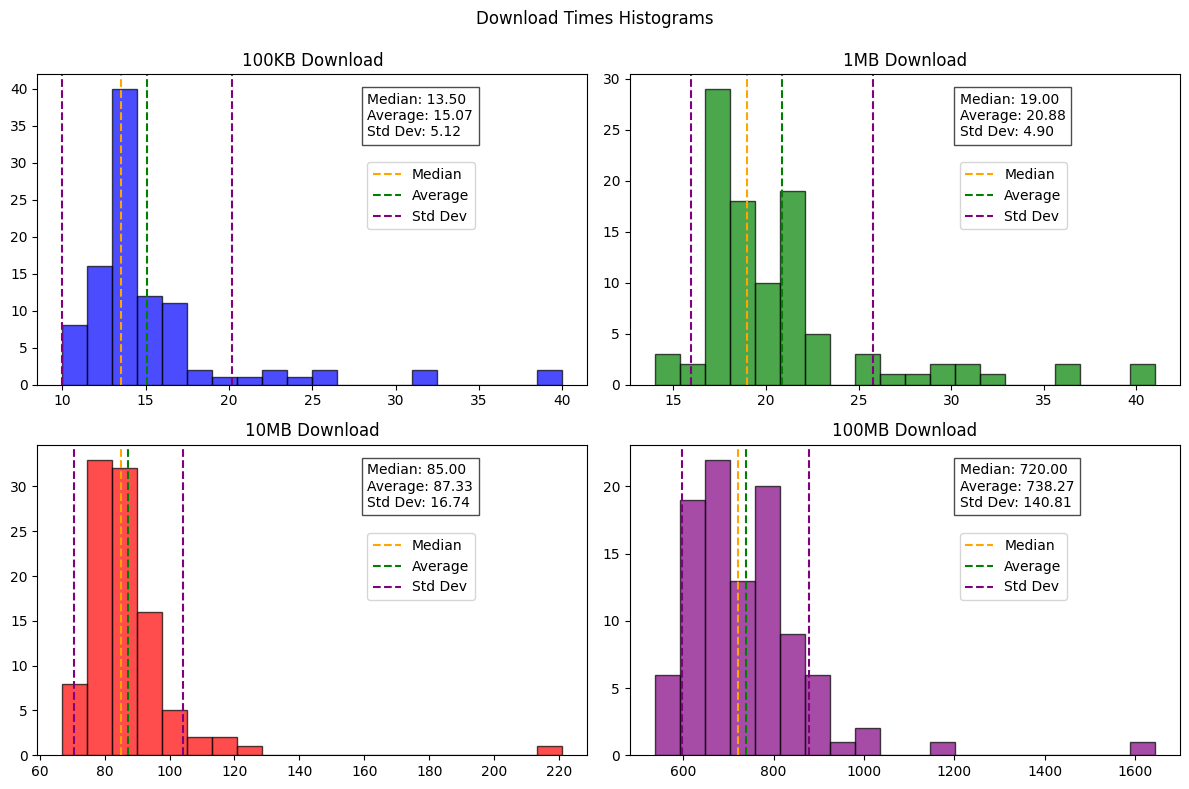

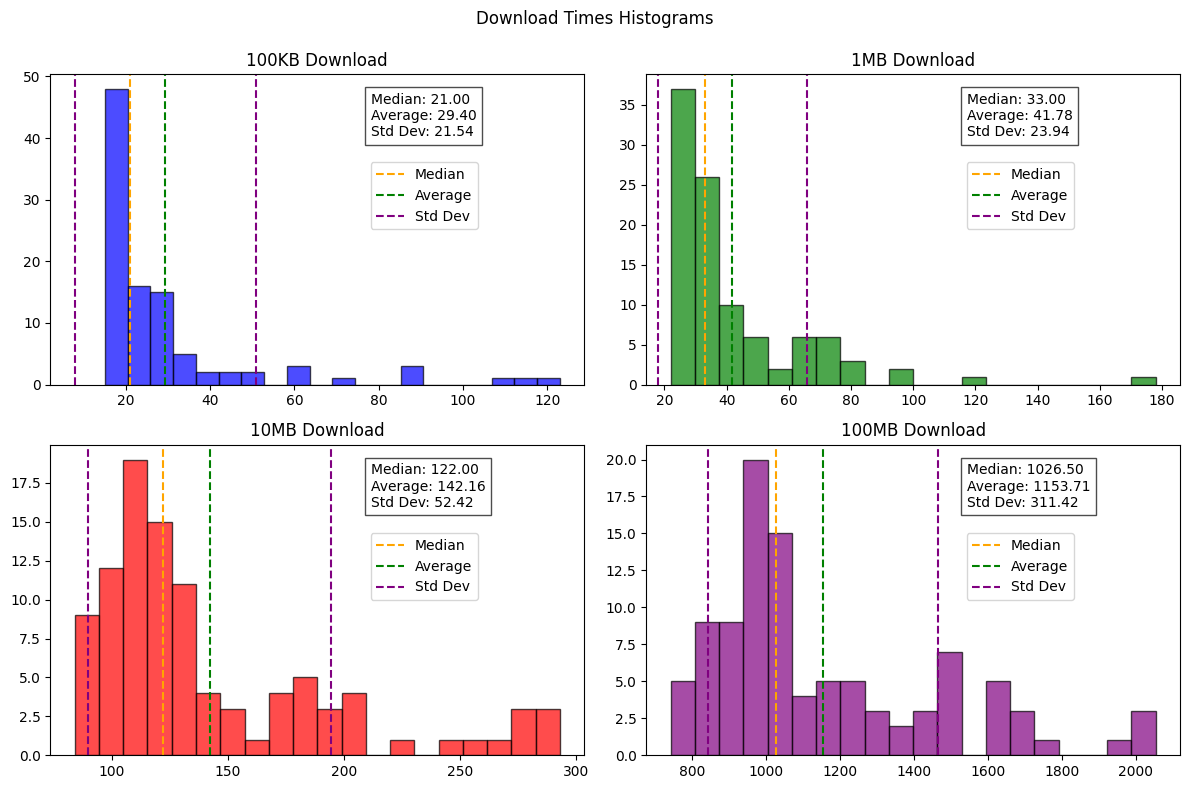

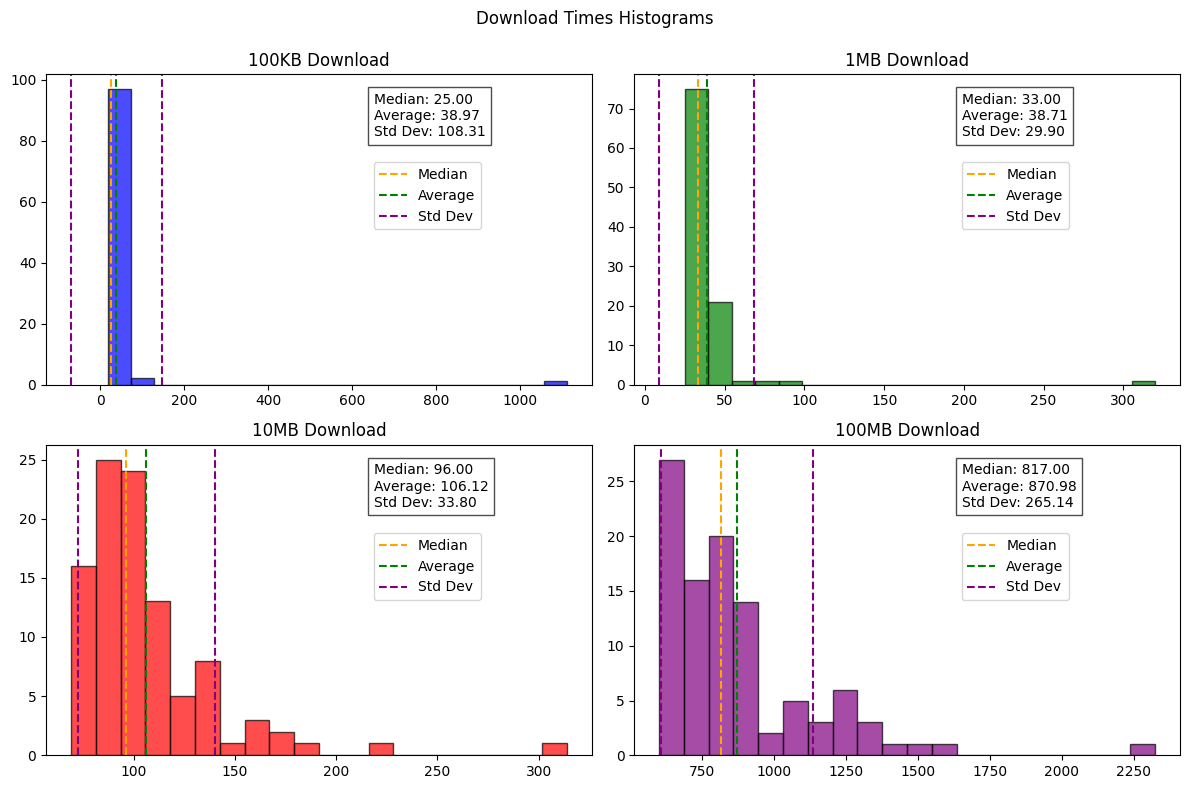

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Define a list of colors for each class
class_colors = {
    "100KB Download": 'blue',
    "1MB upload": 'green',
    "10MB Download": 'red',
    "100MB Download": 'purple'
}

files1 = ['Data/downloadMinset3.json', 'Data/downloadMinset6.json', 'Data/downloadMinset12.json', 'Data/downloadMinset24.json']
files2 = ['Data/downloadBuddy3.json','Data/downloadBuddy6.json', 'Data/downloadBuddy12.json', 'Data/downloadBuddy24.json']
files3 = ['Data/downloadRandom3.json','Data/downloadRandom6.json', 'Data/downloadRandom12.json', 'Data/downloadRandom24.json']
for file in files3:
    # Load data from JSON file
    with open(f'{file}', 'r') as json_file:
        download_data = json.load(json_file)

    # Initialize dictionaries to store data for each class
    class_data = {
        "100KB Download": [],
        "1MB Download": [],
        "10MB Download": [],
        "100MB Download": []
    }

    # Iterate through results and filter data for each class
    for result in download_data["results"]:
        class_name = result["name"]
        times = result["times"]
        class_data[class_name].extend(times)

    # Create subplots for each class
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Download Times Histograms")

    # Iterate over each class and subplot
    for i, (class_name, data) in enumerate(class_data.items()):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        # Plot histogram with the color based on class
        ax.hist(data, bins=20, alpha=0.7, color=class_colors[class_name], edgecolor='black')
        ax.set_title(class_name)

        # Calculate statistics
        median = np.median(data)
        avg = np.mean(data)
        std_dev = np.std(data)

        # Add statistics to the plot
        stats_text = f"Median: {median:.2f}\nAverage: {avg:.2f}\nStd Dev: {std_dev:.2f}"
        ax.text(0.6, 0.8, stats_text, transform=ax.transAxes, fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.7})

        # Add lines for median, average, and std dev
        ax.axvline(median, color='orange', linestyle='--', label='Median')
        ax.axvline(avg, color='green', linestyle='--', label='Average')
        ax.axvline(avg + std_dev, color='purple', linestyle='--', label='Std Dev')
        ax.axvline(avg - std_dev, color='purple', linestyle='--')

        # Add legend at coordinates (0.7, 0.8)
        ax.legend(loc=(0.6, 0.5))
        #ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Show the plot
    plt.show()


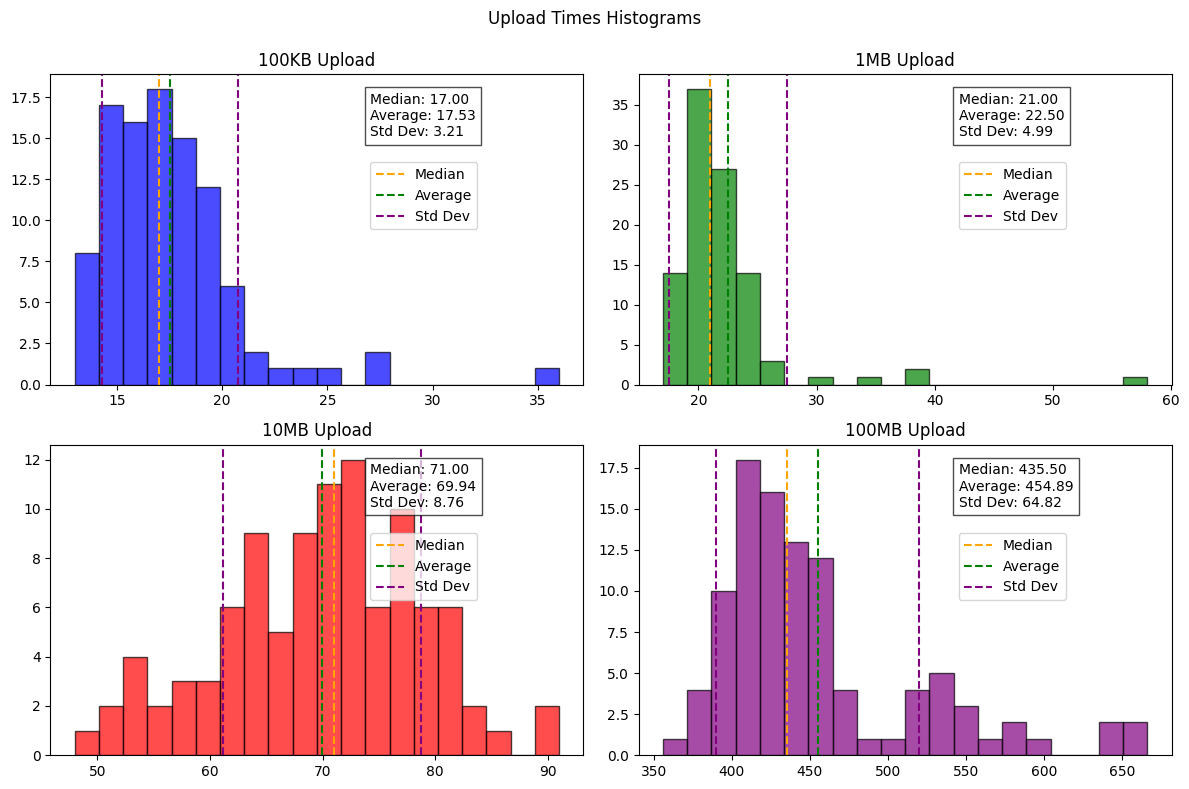

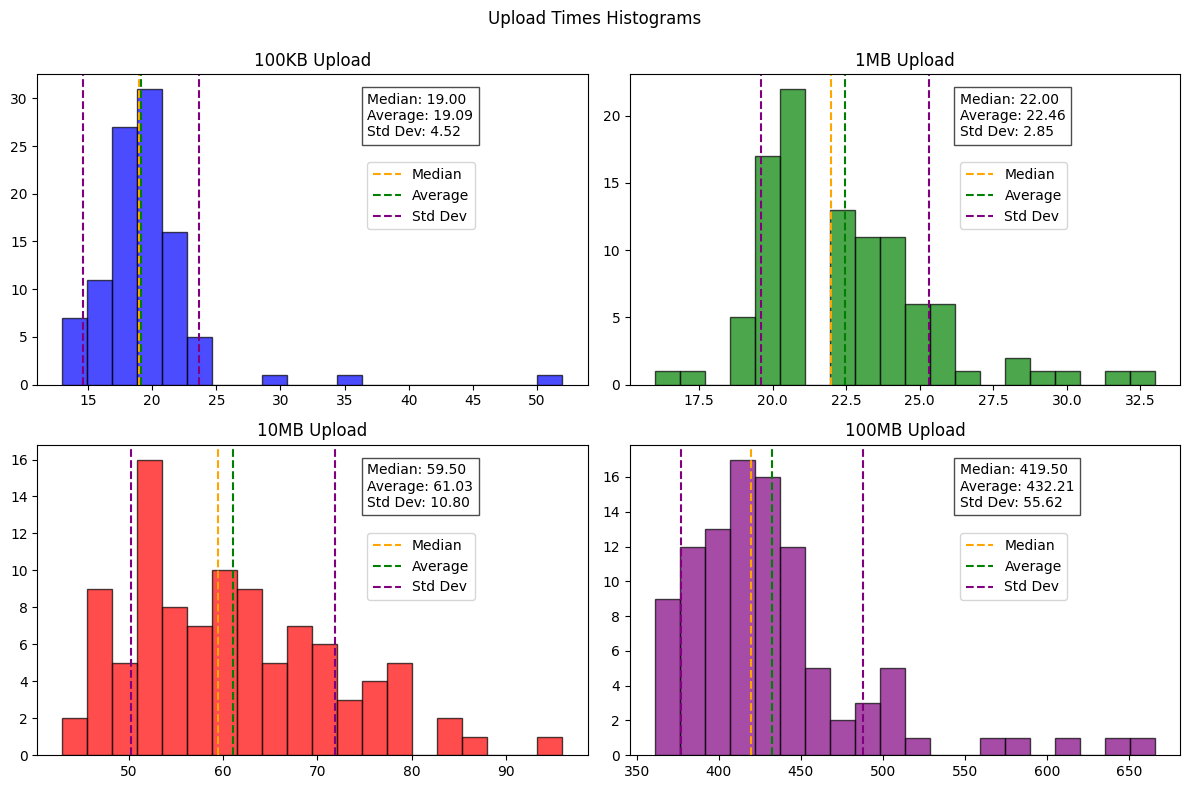

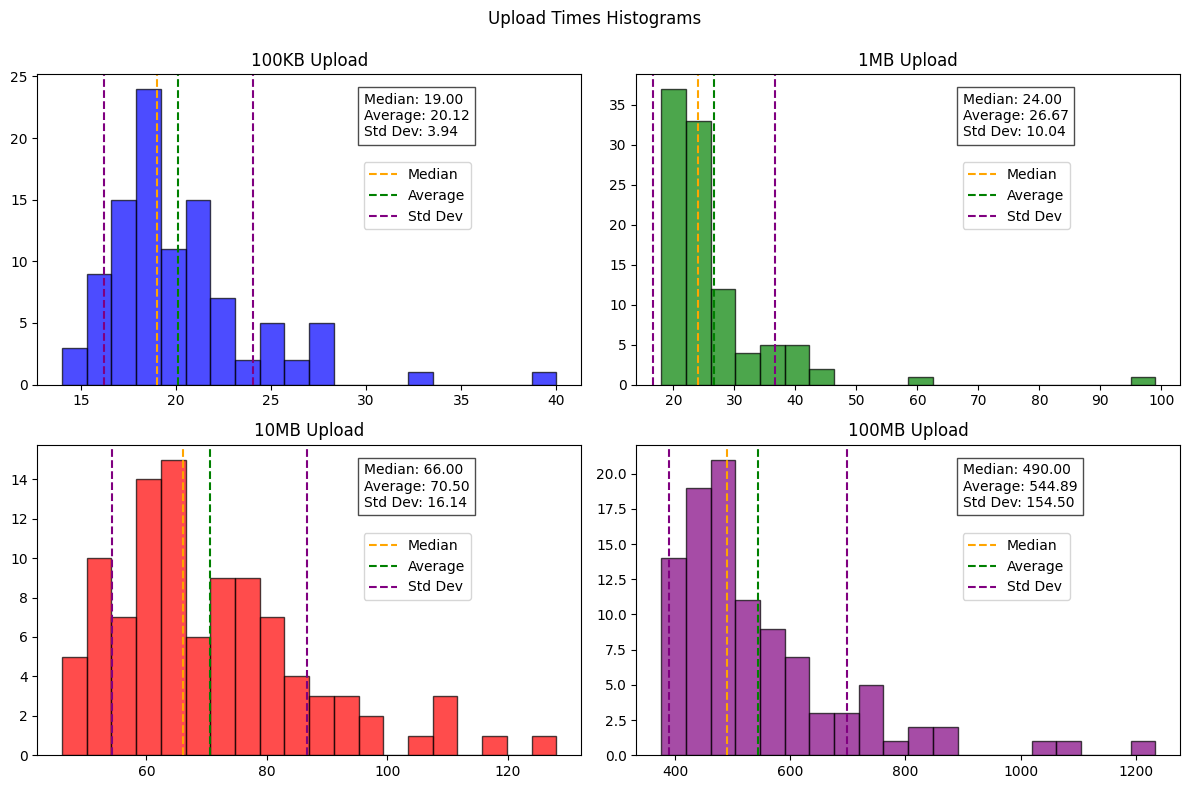

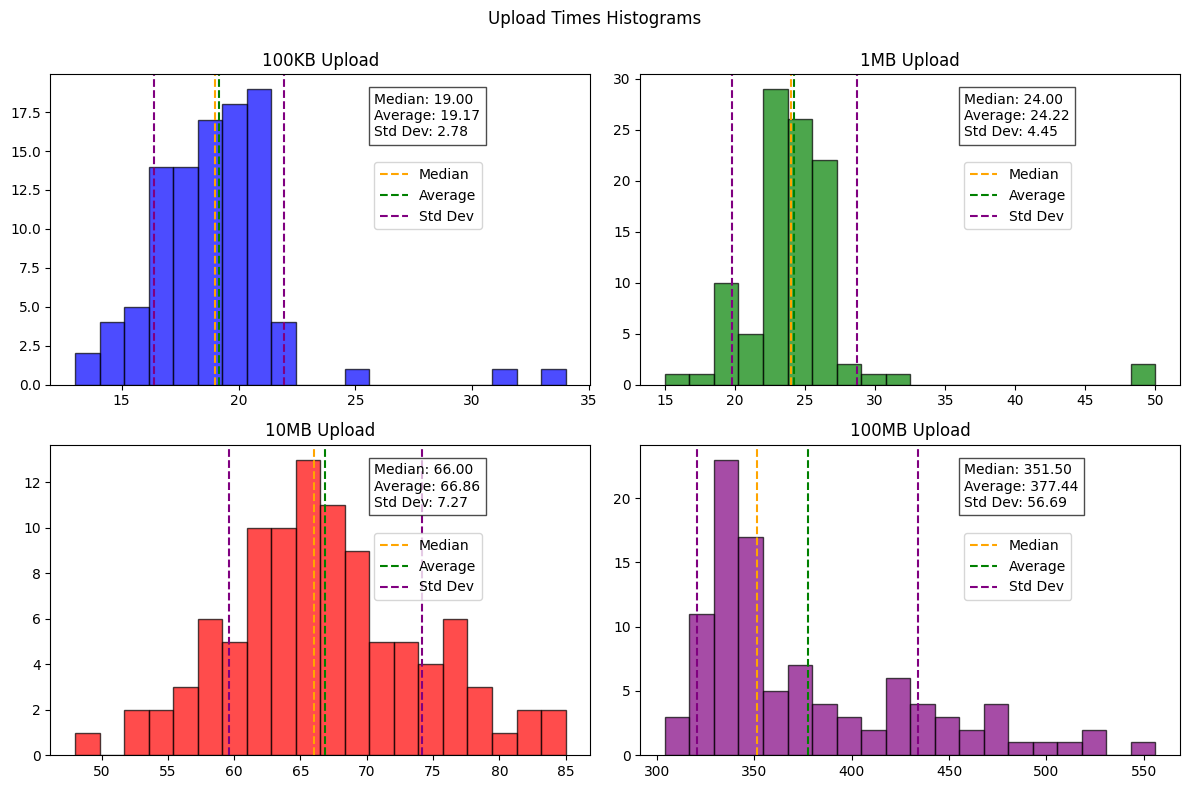

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Define a list of colors for each class
class_colors = {
    "100KB Upload": 'blue',
    "1MB Upload": 'green',
    "10MB Upload": 'red',
    "100MB Upload": 'purple'
}

files1 = ['Data/uploadMinset3.json', 'Data/uploadMinset6.json', 'Data/uploadMinset12.json', 'Data/uploadMinset24.json']
files2 = ['Data/uploadBuddy3.json','Data/uploadBuddy6.json', 'Data/uploadBuddy12.json', 'Data/uploadBuddy24.json']
files3 = ['Data/uploadRandom3.json','Data/uploadRandom6.json', 'Data/uploadRandom12.json', 'Data/uploadRandom24.json']
for file in files3:
    # Load data from JSON file
    with open(f'{file}', 'r') as json_file:
        download_data = json.load(json_file)

    # Initialize dictionaries to store data for each class
    class_data = {
        "100KB Upload": [],
        "1MB Upload": [],
        "10MB Upload": [],
        "100MB Upload": []
    }

    # Iterate through results and filter data for each class
    for result in download_data["results"]:
        class_name = result["name"]
        times = result["times"]
        class_data[class_name].extend(times)

    # Create subplots for each class
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Upload Times Histograms")

    # Iterate over each class and subplot
    for i, (class_name, data) in enumerate(class_data.items()):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        # Plot histogram with the color based on class
        ax.hist(data, bins=20, alpha=0.7, color=class_colors[class_name], edgecolor='black')
        ax.set_title(class_name)

        # Calculate statistics
        median = np.median(data)
        avg = np.mean(data)
        std_dev = np.std(data)

        # Add statistics to the plot
        stats_text = f"Median: {median:.2f}\nAverage: {avg:.2f}\nStd Dev: {std_dev:.2f}"
        ax.text(0.6, 0.8, stats_text, transform=ax.transAxes, fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.7})

        # Add lines for median, average, and std dev
        ax.axvline(median, color='orange', linestyle='--', label='Median')
        ax.axvline(avg, color='green', linestyle='--', label='Average')
        ax.axvline(avg + std_dev, color='purple', linestyle='--', label='Std Dev')
        ax.axvline(avg - std_dev, color='purple', linestyle='--')

        # Add legend at coordinates (0.7, 0.8)
        ax.legend(loc=(0.6, 0.5))
        #ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Show the plot
    plt.show()


In [40]:
import pandas as pd
import numpy as np
import json

# Load data from JSON files for each dataset
datasets = {
    "Buddy": ['Data/downloadBuddy3.json', 'Data/downloadBuddy6.json', 'Data/downloadBuddy12.json', 'Data/downloadBuddy24.json'],
    "Minset": ['Data/downloadMinset3.json', 'Data/downloadMinset6.json', 'Data/downloadMinset12.json', 'Data/downloadMinset24.json'],
    "Random": ['Data/downloadRandom3.json', 'Data/downloadRandom6.json', 'Data/downloadRandom12.json', 'Data/downloadRandom24.json']
}

# Initialize a list to store data
data = []

# Iterate through datasets
for dataset_name, files in datasets.items():
    for file in files:
        # Initialize a dictionary to store statistics for each file
        stats = {
            "Dataset": dataset_name,
            "File": file.split('/')[-1],
        }
        
        with open(file, 'r') as json_file:
            download_data = json.load(json_file)

        # Iterate through results and filter data for each class (download and upload)
        for result in download_data["results"]:
            class_name = result["name"]
            times = result["times"]
            median = np.median(times)
            avg = np.mean(times)
            std_dev = np.std(times)
            stats[f"{class_name} Median"] = median
            stats[f"{class_name} Average"] = avg
            stats[f"{class_name} Std Dev"] = std_dev
        
        data.append(stats)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the order of columns
column_order = ["Dataset", "File", "100KB Download Median", "100KB Download Average", "100KB Download Std Dev",
                "1MB Download Median", "1MB Download Average", "1MB Download Std Dev",
                "10MB Download Median", "10MB Download Average", "10MB Download Std Dev",
                "100MB Download Median", "100MB Download Average", "100MB Download Std Dev"]

df = df[column_order]

# Display the DataFrame
display(df)


,Dataset,File,100KB Download Median,100KB Download Average,100KB Download Std Dev,1MB Download Median,1MB Download Average,1MB Download Std Dev,10MB Download Median,10MB Download Average,10MB Download Std Dev,100MB Download Median,100MB Download Average,100MB Download Std Dev
0,Buddy,downloadBuddy3.json,14.0,19.070000,15.512095,23.0,31.450000,22.216829,105.0,125.710000,61.768486,932.5,1050.860000,353.726477
1,Buddy,downloadBuddy6.json,18.0,21.212121,17.077525,25.0,73.959596,62.797722,107.0,124.333333,56.025788,1013.0,1032.383838,110.377745
2,Buddy,downloadBuddy12.json,23.0,25.520000,9.313947,29.5,33.620000,13.266333,109.0,112.580000,24.152507,919.0,932.380000,155.895784
3,Buddy,downloadBuddy24.json,31.0,33.150000,12.583620,39.0,43.610000,18.345514,111.0,121.390000,33.108879,986.0,969.030000,297.037791
4,Minset,downloadMinset3.json,20.0,27.840000,27.385295,55.0,63.850000,43.596187,139.0,144.970000,38.293721,1460.0,1379.160000,275.408051
5,Minset,downloadMinset6.json,24.0,38.860000,31.817926,34.0,42.820000,23.482070,103.5,112.790000,25.065632,1030.0,1079.510000,196.955045
6,Minset,downloadMinset12.json,31.0,34.320000,10.186147,50.0,54.260000,19.448198,169.0,176.690000,45.814342,1326.5,1372.220000,221.670683
7,Minset,downloadMinset24.json,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,Random,downloadRandom3.json,12.0,14.610000,7.721263,19.0,20.580000,5.897762,84.5,87.440000,13.646479,676.5,728.500000,154.407416
9,Random,downloadRandom6.json,13.5,15.070000,5.121045,19.0,20.880000,4.903631,85.0,87.330000,16.737416,720.0,738.270000,140.814194


In [41]:
df.to_csv('download.csv', index=False)

KeyError: '100KB Download'